In [1]:
import os
os.chdir('../py')

import gc

import pandas as pd
import numpy as np
import feather

from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams['font.family'] = 'Ricty Diminised'
sns.set(style="whitegrid", font='Ricty Diminised', palette="muted", color_codes=True, rc={'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

import japanize_matplotlib

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
from sklearn.preprocessing import LabelEncoder

# my modules
import EDA
import utils

from scipy.stats import ks_2samp

import datetime

import super_aggre

In [23]:
import lightgbm as lgb

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score

In [119]:
train = feather.read_dataframe('../input/feather/train.ftr')

In [6]:
test = feather.read_dataframe('../input/feather/test.ftr')

In [25]:
params = {'objective': 'binary', "boosting_type": "gbdt", "subsample": 1, "bagging_seed": 11, "metric": 'auc', 'random_state': 47}

In [30]:
preds

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,nan
840073,0.012847,0.012847,0.012847,0.012847,0.024815,0.024815,0.024815,0.024027,0.018608,0.018608,...,0.032511,0.032511,0.046129,0.046129,0.046129,0.046129,0.046129,0.046129,0.046129,0.013503
222680,0.013503,0.013503,0.039720,0.039720,0.039720,0.039700,0.039404,0.039702,0.039802,0.039802,...,0.167884,0.167884,0.167884,0.167884,0.167884,0.167884,0.167884,0.167884,0.167884,0.167884
21755,0.167884,0.167884,0.271487,0.271487,0.271487,0.271487,0.472610,0.472610,0.472610,0.446460,...,0.594393,0.594393,0.594393,0.594393,0.678345,0.678345,0.678345,0.678345,0.678345,0.678345
5251,0.678345,0.373798,0.373798,0.373798,0.643342,0.643342,0.643342,0.644515,0.642731,0.644530,...,0.787218,0.787218,0.787218,0.787218,0.787218,0.787218,0.787218,0.787218,0.787218,0.787218
2143,0.787218,0.787218,0.787218,0.787218,0.779998,0.779998,0.779998,0.779998,0.895020,0.895020,...,0.798999,0.798999,0.798999,0.798999,0.798999,0.798999,0.851204,0.851204,0.851204,0.851204
1162,0.851204,0.851204,0.851204,0.618206,0.618206,0.618206,0.830306,0.830306,0.830306,0.837289,...,0.801354,0.801354,0.801354,0.801354,0.801354,0.801354,0.801354,0.801354,0.801354,0.801354
770,0.801354,0.801354,0.801354,0.801354,0.801354,0.801354,0.840406,0.840406,0.840406,0.840406,...,0.895165,0.859050,0.809871,0.809871,0.809871,0.809871,0.809871,0.809871,0.859747,0.859747
540,0.859747,0.859747,0.859747,0.859747,0.859747,0.634382,0.634382,0.634382,0.839824,0.839824,...,0.926782,0.927313,0.927518,0.927518,0.927518,0.927518,0.927518,0.927518,0.927518,0.927518
402,0.927518,0.927518,0.927518,0.927518,0.927518,0.927518,0.927518,0.927518,0.780761,0.780761,...,0.877447,0.877447,0.877447,0.835648,0.780231,0.780231,0.780231,0.780231,0.780231,0.780231
301,0.836312,0.836312,0.836312,0.836312,0.836312,0.836312,0.836312,0.591194,0.591194,0.591194,...,0.931083,0.948506,0.949782,0.949679,0.947216,0.951200,0.951200,0.951200,0.951200,0.951200


In [29]:
result_df

,V258,V258_count
0,0.0,2
1,0.0,3
2,0.0,4
3,0.0,5
4,0.0,6
5,0.0,7
6,0.0,8
7,0.0,9
8,0.0,12
9,0.0,13


In [32]:
clf.predict_proba(result_df)[:, 1]

array([0.01284672, 0.01284672, 0.01284672, ..., 0.02281203, 0.02281203,
       0.02281203])

In [34]:
X_train.shape

(395661, 2)

In [35]:
result_df.shape

(3128, 2)

In [36]:
x.shape

(46, 2)

In [42]:
x

,V258,V258_count
0,NaN,2
1,NaN,3
2,NaN,4
3,NaN,5
4,NaN,6
5,NaN,7
6,NaN,8
7,NaN,9
8,NaN,12
9,NaN,13


In [41]:
result_df['V258'].nunique()

67

In [38]:
X[COL_NAME].nunique()

67

In [44]:
train['V258'].nunique(dropna=False) * train['V258'].value_counts(dropna=False).nunique()

1972

In [54]:
pd.qcut(train['TransactionAmt'].astype(int), 50, duplicates='drop').unique()

[(60.0, 68.0], (25.0, 29.0], (58.0, 59.0], (49.0, 50.0], (47.0, 49.0], ..., (107.0, 108.0], (80.0, 87.0], (159.0, 171.0], (50.0, 54.0], (30.0, 31.0]]
Length: 42
Categories (42, interval[float64]): [(-0.001, 12.0] < (12.0, 17.0] < (17.0, 22.0] < (22.0, 25.0] ... (315.0, 385.0] < (385.0, 500.0] < (500.0, 768.0] < (768.0, 31937.0]]

In [37]:
i

nan

In [60]:
import itertools

In [64]:
np.array([1, 2])

array([1, 2])

In [69]:
COL_NAME = 'TransactionAmt'
TARGET   = 'isFraud'

y = train[TARGET]
X = pd.DataFrame()
X[COL_NAME] = train[COL_NAME].astype(int)
X[f'{COL_NAME}_count'] = train[COL_NAME].map(pd.concat([train[COL_NAME], test[COL_NAME].astype(int)], ignore_index=True).value_counts(dropna=False))

arr = []
for i, j in itertools.product(X[COL_NAME].sort_values().unique(), X[f'{COL_NAME}_count'].sort_values().unique()):
    arr.append(np.array([i, j]))

In [71]:
tmp = pd.DataFrame(arr)

In [74]:
tmp.dtypes

0    int64
1    int64
dtype: object

In [66]:
arr

[array([0., 2.]),
 array([0., 3.]),
 array([0., 4.]),
 array([0., 5.]),
 array([0., 6.]),
 array([0., 7.]),
 array([0., 8.]),
 array([0., 9.]),
 array([ 0., 12.]),
 array([ 0., 13.]),
 array([ 0., 14.]),
 array([ 0., 15.]),
 array([ 0., 16.]),
 array([ 0., 17.]),
 array([ 0., 18.]),
 array([ 0., 19.]),
 array([ 0., 20.]),
 array([ 0., 22.]),
 array([ 0., 23.]),
 array([ 0., 25.]),
 array([ 0., 27.]),
 array([ 0., 29.]),
 array([ 0., 31.]),
 array([ 0., 33.]),
 array([ 0., 43.]),
 array([ 0., 54.]),
 array([ 0., 60.]),
 array([ 0., 61.]),
 array([ 0., 71.]),
 array([ 0., 76.]),
 array([  0., 102.]),
 array([  0., 121.]),
 array([  0., 152.]),
 array([  0., 189.]),
 array([  0., 190.]),
 array([  0., 262.]),
 array([  0., 301.]),
 array([  0., 402.]),
 array([  0., 540.]),
 array([  0., 770.]),
 array([   0., 1162.]),
 array([   0., 2143.]),
 array([   0., 5251.]),
 array([    0., 21755.]),
 array([     0., 222680.]),
 array([     0., 840073.]),
 array([1., 2.]),
 array([1., 3.]),
 array

In [ ]:
class Visualize_Interaction():
    def __init__(self, train, test, column, is_numeric=False, seed=42):
        self.train = train
        self.test  = test
        self.column = column
        self.target = self.target
        self.is_numeric = is_numeric
        self.seed = seed
        
        y = self.train[self.target]
        X = pd.DataFrame()
        if is_numeric:
            X[self.column] = self.train[self.column].astype(int)
            X[f'{self.column}_count'] = self.train[self.column].map(
                pd.concat([self.train[self.column].astype(int),
                           self.test[self.column].astype(int)],
                          ignore_index=True
            ).value_counts(dropna=False))
        else:
            X[self.column] = self.train[self.column]
            X[f'{self.column}_count'] = self.train[self.column].map(
                pd.concat([self.train[self.column],
                           self.test[self.column]],
                          ignore_index=True
            ).value_counts(dropna=False))
            
        self.X = X
        self.y = y
    
    def no_encoding_prediction(self):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X[self.column],
            self.y,
            test_size=0.33,
            random_state=seed,
            stratify=self.y
        )
        clf = lgb.LGBMClassifier(**params)
        clf.fit(X_train.values.reshape(-1, 1), y_train)
        print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test.values.reshape(-1, 1))[:, 1]))
        
        x = clf.predict_proba(X[self.column].sort_values().unique().reshape(-1, 1))[:, 1]
        x = pd.Series(x, index=X[self.column].sort_values().unique()).to_frame().T
        
        return x
    
    def count_encoding_predicton(self):
        result_df = pd.DataFrame()
        arr = []
        for i, j in itertools.product(X[self.column].sort_values().unique(), X[f'{self.column}_count'].sort_values().unique()):
            arr.append(np.array([i, j]))
        result_df = pd.DataFrame(arr, columns=[self.column, f'{self.column}_count'])

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)
        clf = lgb.LGBMClassifier(**params)
        clf.fit(X_train, y_train)
        print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
        
        preds = clf.predict_proba(result_df)[:, 1]
        preds = preds.reshape(X[self.column].nunique(dropna=False), X[f'{self.column}_count'].nunique(dropna=False))
        preds = pd.DataFrame(preds, index=X[self.column].sort_values().unique(), columns=X[f'{self.column}_count'].sort_values(ascending=False).unique()).T
        
        return preds
    
    def visualize(self):
        x = self.no_encoding_prediction()
        preds = self.count_encoding_predicton()
        
        fig = plt.figure(16, 5)
        ax = fig.add_subplot(2, 1, 1)
        sns.heatmap(x, cmap='RdBu_r', center=0.0)
        ax.set_label('no encoding')
        
        ax = fig.add_subplot(2, 1, 2)
        sns.heatmap(preds, cmap='RdBu_r', center=0.0)
        ax.set_ylabel(f'{COL_NAME}_count')
        ax.set_xlabel(f'{COL_NAME}')
        ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction');

In [172]:
x = x.to_frame().T

In [196]:
arr = []
for col in preds.columns:
    arr.append(preds[col].max())

max_proba = max(arr)

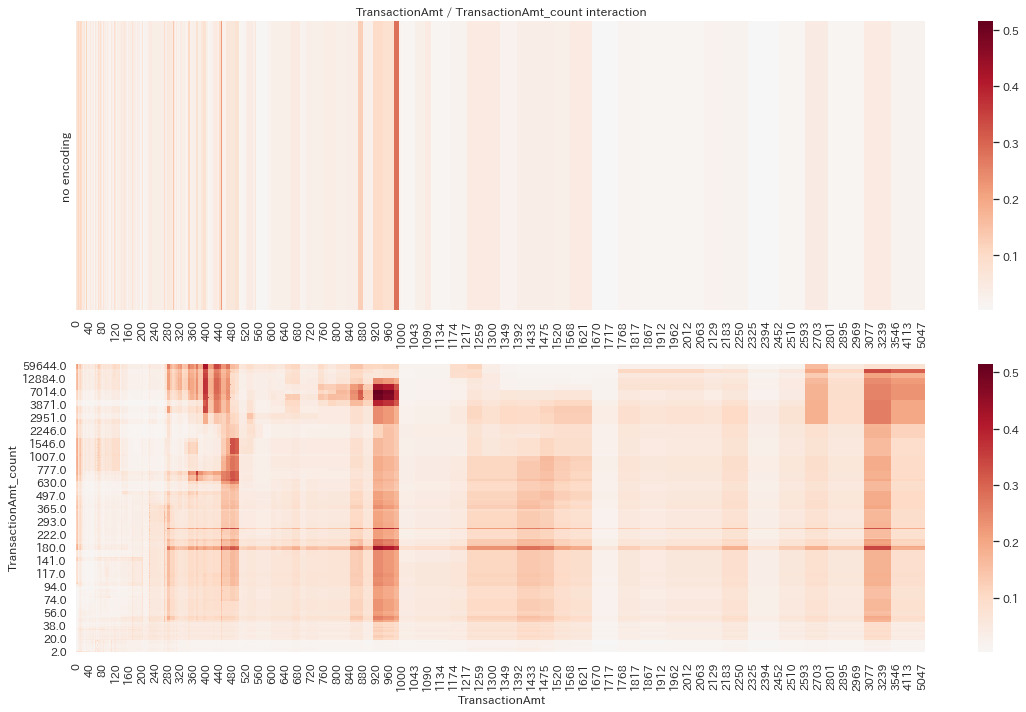

In [200]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(2, 1, 1)
sns.heatmap(x, cmap='RdBu_r', center=0.0, vmax=max_proba)
ax.set_yticks([])
ax.set_ylabel('no encoding')
ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction')

ax = fig.add_subplot(2, 1, 2)
sns.heatmap(preds, cmap='RdBu_r', center=0.0, vmax=max_proba)
ax.set_ylabel(f'{COL_NAME}_count')
ax.set_xlabel(f'{COL_NAME}')

# fig.suptitle(f'{COL_NAME} / {COL_NAME}_count interaction')
plt.tight_layout()
plt.show()

ROC AUC score: 0.6929916198705168
ROC AUC score: 0.7677377885485746


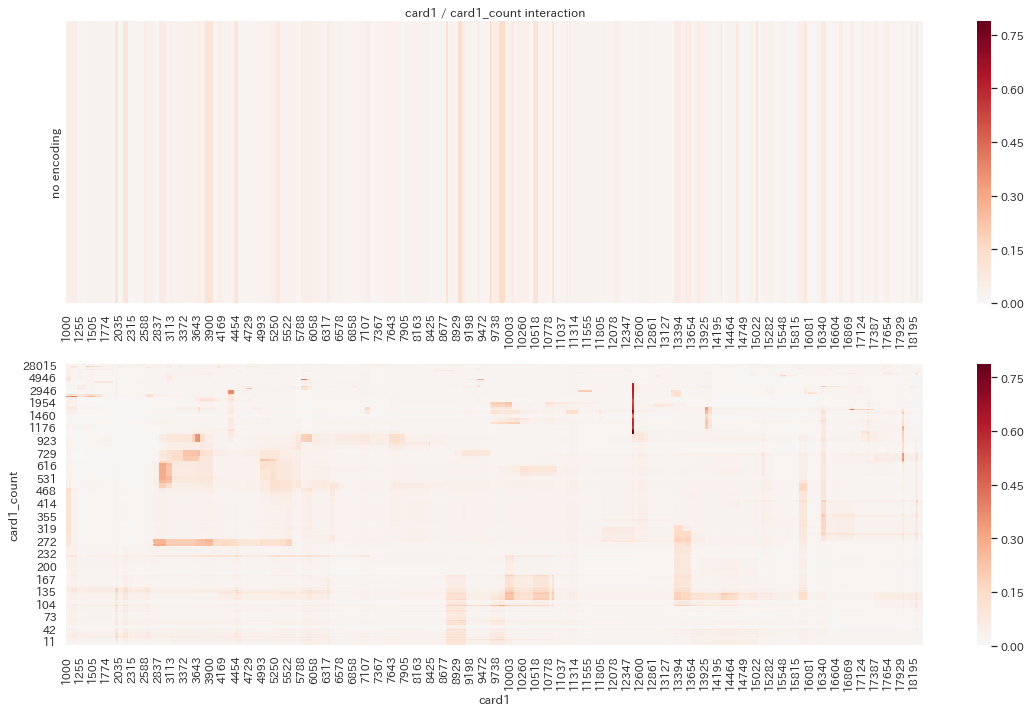

In [206]:
COL_NAME = 'card1'
TARGET   = 'isFraud'

y = train[TARGET]
X = pd.DataFrame()
X[COL_NAME] = train[COL_NAME]
X[f'{COL_NAME}_count'] = train[COL_NAME].map(pd.concat([train[COL_NAME], test[COL_NAME]], ignore_index=True).value_counts(dropna=False))

# No Encoding
X_train, X_test, y_train, y_test = train_test_split(X[COL_NAME], y, test_size=0.33, random_state=47, stratify=y)
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train.values.reshape(-1, 1), y_train)
print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test.values.reshape(-1, 1))[:, 1]))

x = clf.predict_proba(X[COL_NAME].sort_values().unique().reshape(-1, 1))[:, 1]
x = pd.Series(x, index=X[COL_NAME].sort_values().unique()).to_frame().T

# Count Encoding
result_df = pd.DataFrame()
arr = []
for i, j in itertools.product(X[COL_NAME].sort_values().unique(), X[f'{COL_NAME}_count'].sort_values().unique()):
    arr.append(np.array([i, j]))
result_df = pd.DataFrame(arr, columns=[COL_NAME, f'{COL_NAME}_count'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, y_train)
print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

preds = clf.predict_proba(result_df)[:, 1]
preds = preds.reshape(X[COL_NAME].nunique(dropna=False), X[f'{COL_NAME}_count'].nunique(dropna=False))
preds = pd.DataFrame(preds, index=X[COL_NAME].sort_values().unique(), columns=X[f'{COL_NAME}_count'].sort_values(ascending=False).unique()).T


# Visualization
arr = []
for col in preds.columns:
    arr.append(preds[col].max())
max_proba = max(arr)

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(2, 1, 1)
sns.heatmap(x, cmap='RdBu_r', center=0.0, vmax=max_proba)
ax.set_yticks([])
ax.set_ylabel('no encoding')
ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction')

ax = fig.add_subplot(2, 1, 2)
sns.heatmap(preds, cmap='RdBu_r', center=0.0, vmax=max_proba)
ax.set_ylabel(f'{COL_NAME}_count')
ax.set_xlabel(f'{COL_NAME}')

# fig.suptitle(f'{COL_NAME} / {COL_NAME}_count interaction')
plt.tight_layout()
plt.show()

ROC AUC score: 0.6855356239877327
ROC AUC score: 0.6859684110762889


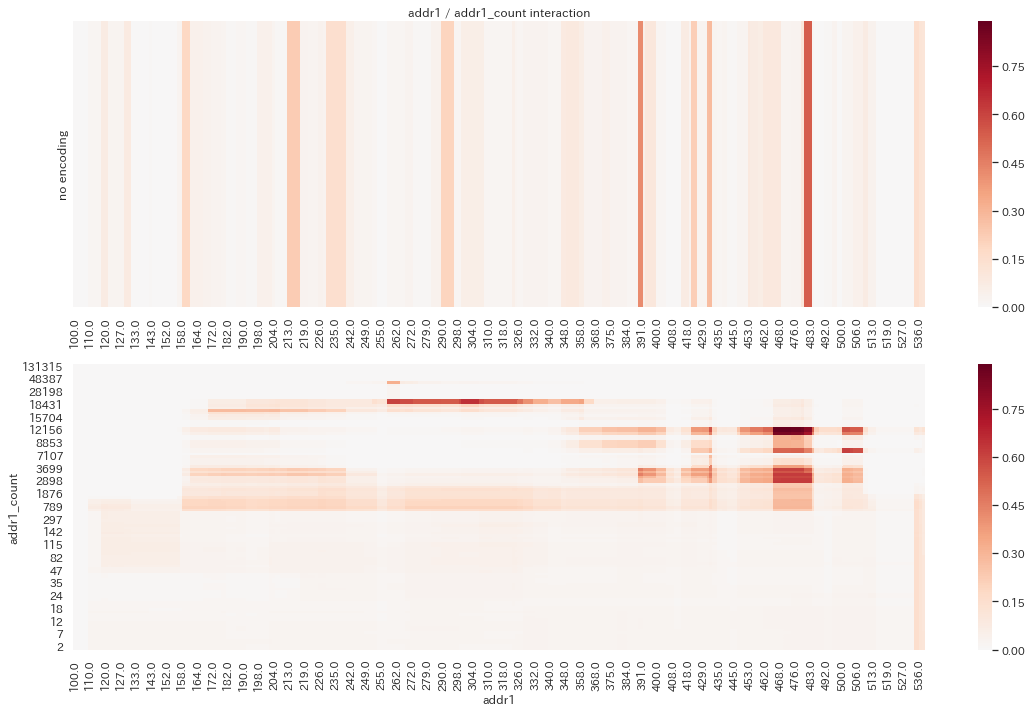

In [205]:
COL_NAME = 'addr1'
TARGET   = 'isFraud'

y = train[TARGET]
X = pd.DataFrame()
X[COL_NAME] = train[COL_NAME]
X[f'{COL_NAME}_count'] = train[COL_NAME].map(pd.concat([train[COL_NAME], test[COL_NAME]], ignore_index=True).value_counts(dropna=False))

# No Encoding
X_train, X_test, y_train, y_test = train_test_split(X[COL_NAME], y, test_size=0.33, random_state=47, stratify=y)
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train.values.reshape(-1, 1), y_train)
print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test.values.reshape(-1, 1))[:, 1]))

x = clf.predict_proba(X[COL_NAME].sort_values().unique().reshape(-1, 1))[:, 1]
x = pd.Series(x, index=X[COL_NAME].sort_values().unique()).to_frame().T

# Count Encoding
result_df = pd.DataFrame()
arr = []
for i, j in itertools.product(X[COL_NAME].sort_values().unique(), X[f'{COL_NAME}_count'].sort_values().unique()):
    arr.append(np.array([i, j]))
result_df = pd.DataFrame(arr, columns=[COL_NAME, f'{COL_NAME}_count'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, y_train)
print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

preds = clf.predict_proba(result_df)[:, 1]
preds = preds.reshape(X[COL_NAME].nunique(dropna=False), X[f'{COL_NAME}_count'].nunique(dropna=False))
preds = pd.DataFrame(preds, index=X[COL_NAME].sort_values().unique(), columns=X[f'{COL_NAME}_count'].sort_values(ascending=False).unique()).T


# Visualization
arr = []
for col in preds.columns:
    arr.append(preds[col].max())
max_proba = max(arr)

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(2, 1, 1)
sns.heatmap(x, cmap='RdBu_r', center=0.0, vmax=max_proba)
ax.set_yticks([])
ax.set_ylabel('no encoding')
ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction')

ax = fig.add_subplot(2, 1, 2)
sns.heatmap(preds, cmap='RdBu_r', center=0.0, vmax=max_proba)
ax.set_ylabel(f'{COL_NAME}_count')
ax.set_xlabel(f'{COL_NAME}')

# fig.suptitle(f'{COL_NAME} / {COL_NAME}_count interaction')
plt.tight_layout()
plt.show()

ROC AUC score: 0.7074169485992285
ROC AUC score: 0.7632245258223307


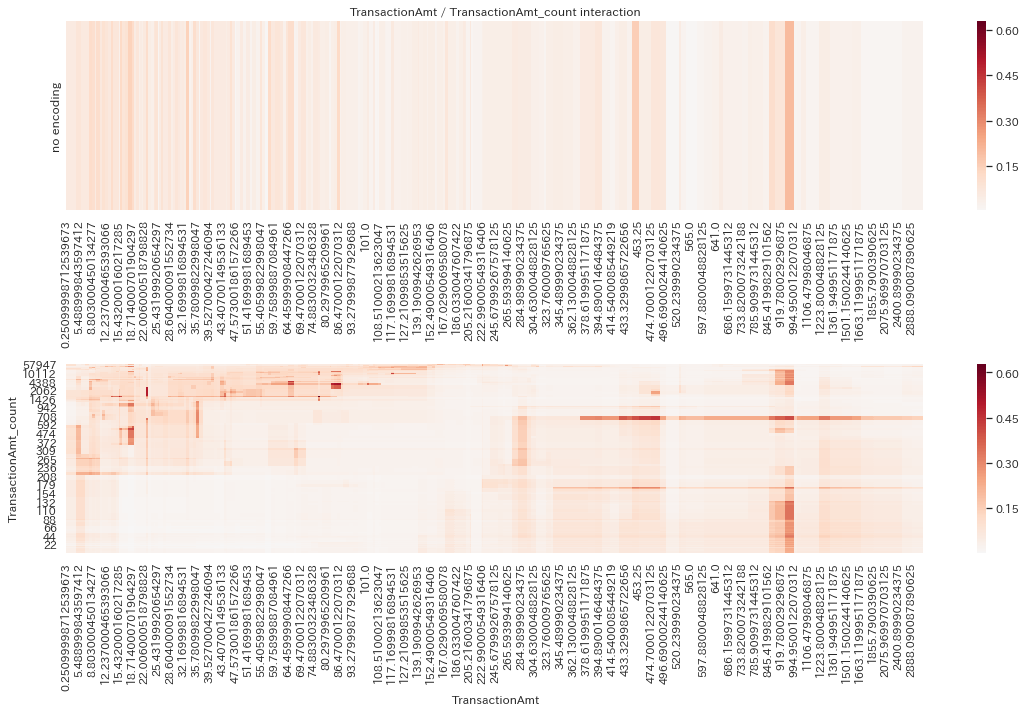

In [207]:
COL_NAME = 'TransactionAmt'
TARGET   = 'isFraud'

y = train[TARGET]
X = pd.DataFrame()
X[COL_NAME] = train[COL_NAME]
X[f'{COL_NAME}_count'] = train[COL_NAME].map(pd.concat([train[COL_NAME], test[COL_NAME]], ignore_index=True).value_counts(dropna=False))

# No Encoding
X_train, X_test, y_train, y_test = train_test_split(X[COL_NAME], y, test_size=0.33, random_state=47, stratify=y)
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train.values.reshape(-1, 1), y_train)
print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test.values.reshape(-1, 1))[:, 1]))

x = clf.predict_proba(X[COL_NAME].sort_values().unique().reshape(-1, 1))[:, 1]
x = pd.Series(x, index=X[COL_NAME].sort_values().unique()).to_frame().T

# Count Encoding
result_df = pd.DataFrame()
arr = []
for i, j in itertools.product(X[COL_NAME].sort_values().unique(), X[f'{COL_NAME}_count'].sort_values().unique()):
    arr.append(np.array([i, j]))
result_df = pd.DataFrame(arr, columns=[COL_NAME, f'{COL_NAME}_count'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, y_train)
print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

preds = clf.predict_proba(result_df)[:, 1]
preds = preds.reshape(X[COL_NAME].nunique(dropna=False), X[f'{COL_NAME}_count'].nunique(dropna=False))
preds = pd.DataFrame(preds, index=X[COL_NAME].sort_values().unique(), columns=X[f'{COL_NAME}_count'].sort_values(ascending=False).unique()).T


# Visualization
arr = []
for col in preds.columns:
    arr.append(preds[col].max())
max_proba = max(arr)

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(2, 1, 1)
sns.heatmap(x, cmap='RdBu_r', center=0.0, vmax=max_proba)
ax.set_yticks([])
ax.set_ylabel('no encoding')
ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction')

ax = fig.add_subplot(2, 1, 2)
sns.heatmap(preds, cmap='RdBu_r', center=0.0, vmax=max_proba)
ax.set_ylabel(f'{COL_NAME}_count')
ax.set_xlabel(f'{COL_NAME}')

# fig.suptitle(f'{COL_NAME} / {COL_NAME}_count interaction')
plt.tight_layout()
plt.show()

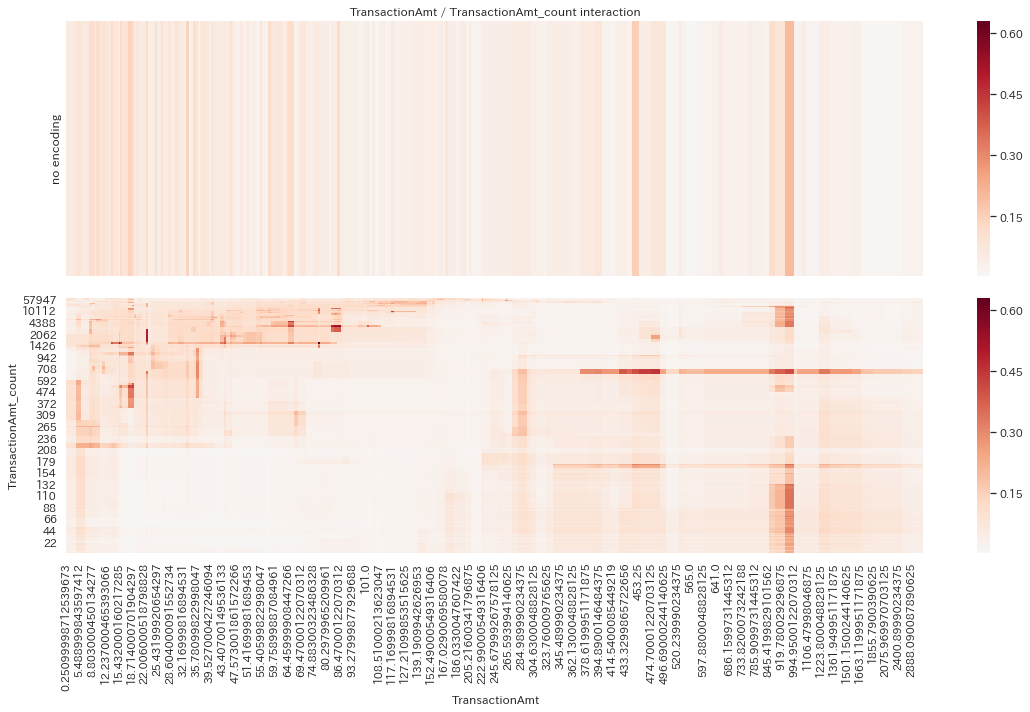

In [208]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(2, 1, 1)
sns.heatmap(x, cmap='RdBu_r', center=0.0, vmax=max_proba)
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('no encoding')
ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction')

ax = fig.add_subplot(2, 1, 2)
sns.heatmap(preds, cmap='RdBu_r', center=0.0, vmax=max_proba)
ax.set_ylabel(f'{COL_NAME}_count')
ax.set_xlabel(f'{COL_NAME}')

# fig.suptitle(f'{COL_NAME} / {COL_NAME}_count interaction')
plt.tight_layout()
plt.show()